In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statistics import stdev
from statistics import mean

In [17]:
def function_fit(x, a, b):
    return a * x + b

Valores del ajuste: 
    a:0.8125778332765087 ± 0.013524395978244985
     b: 0.07567767558950655 ± 0.09295977045755019

Coeficiente de Pearson: 0.9994464264258133


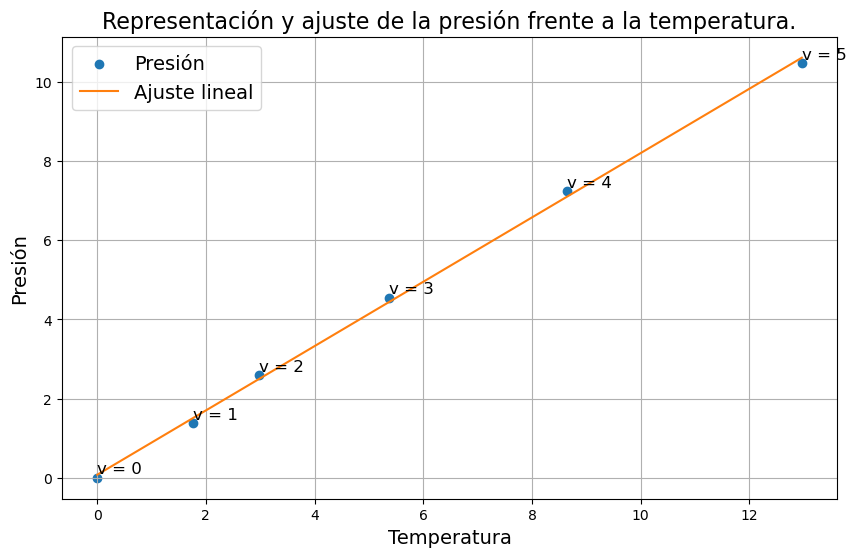

In [18]:
datos_presion = pd.read_csv('datos_apartado_3/pressure.txt', header=0, delimiter=",", names=['v', 'Temp', 'P'])

popt, pcov = curve_fit(function_fit, datos_presion.Temp, datos_presion.P)
data_pred = function_fit(datos_presion.Temp, popt[0], popt[1])

mediax = mean(datos_presion.Temp)
mediay = mean(datos_presion.P)

mediaxy = mean(datos_presion.Temp*datos_presion.P)
sigmax = stdev(datos_presion.Temp)
sigmay = stdev(datos_presion.P)
coef_Pearson = len(datos_presion.Temp)*(mediaxy-mediax*mediay)/((len(datos_presion.Temp)-1)*sigmax*sigmay)

print("Valores del ajuste: ")
print(f"    a:{popt[0]} \u00B1 {np.sqrt(pcov.diagonal()[0])}")
if popt.size > 1:
    print(f"     b: {popt[1]} \u00B1 {np.sqrt(pcov.diagonal()[1])}")
print("")
print(f'Coeficiente de Pearson: {coef_Pearson}')

fig=plt.figure(figsize=(10,6)) #Size of the plot
ax=fig.add_subplot(111)

plt.scatter(datos_presion.Temp, datos_presion.P, label="Presión")
plt.plot(datos_presion.Temp, data_pred, label="Ajuste lineal", color='tab:orange')
for i in range(len(datos_presion.Temp)):
    ax.text(datos_presion.Temp[i], datos_presion.P[i]+0.1, f'v = {datos_presion.v[i]}', fontsize=12)
plt.xlabel("Temperatura", fontsize=14)
plt.ylabel("Presión", fontsize=14)
plt.legend(fontsize=14)
plt.title("Representación y ajuste de la presión frente a la temperatura.", fontsize=16)
plt.grid()

plt.savefig('latex/plots/ajuste_presion.png', bbox_inches='tight', pad_inches=0.1)